# Scraping geospatial data 

## Fetching OpenStreetMap data using overpass

### Find all the resturatnts within a certain given distance from KFUPM

In [79]:
# !pip install overpass
import overpass

api = overpass.API()

# Define the location for the query
location = (26.307, 50.1459) # KFUPM

# Define the raidus of the area for the query in meters
distance = 3000

# Create the Overpass query
overpass_query = f"""
node["amenity"="restaurant"](around:{distance},{location[0]},{location[1]});
out;
"""

restaurants = api.get(overpass_query)

In [80]:
restaurants

{"features": [{"geometry": {"coordinates": [50.128772, 26.308197], "type": "Point"}, "id": 440633807, "properties": {"amenity": "restaurant", "name": "Dining Hall"}, "type": "Feature"}, {"geometry": {"coordinates": [50.142863, 26.317956], "type": "Point"}, "id": 1236774055, "properties": {"amenity": "restaurant", "cuisine": "regional", "name": "Kudu"}, "type": "Feature"}, {"geometry": {"coordinates": [50.121013, 26.302264], "type": "Point"}, "id": 2141533774, "properties": {"amenity": "restaurant", "cuisine": "american", "name": "Rolling Hills Golf Course Clubhouse"}, "type": "Feature"}, {"geometry": {"coordinates": [50.129886, 26.303908], "type": "Point"}, "id": 2141543565, "properties": {"amenity": "restaurant", "cuisine": "asian", "name": "Tandori House Restaurant"}, "type": "Feature"}, {"geometry": {"coordinates": [50.174833, 26.304342], "type": "Point"}, "id": 4086009532, "properties": {"addr:city": "Khobar", "addr:housenumber": "144", "addr:postcode": "133", "addr:street": "Princ

### Print the list of found resturants

In [81]:
print("List of Restaurants:")
restaurant_locations = []
for feature in restaurants["features"]:
    # Extract restaurant details
    name = feature["properties"].get("name", "Unnamed")
    lon, lat = feature["geometry"]["coordinates"]
    restaurant_locations.append((name, lat, lon))
    print(f"- {name}: Latitude: {lat}, Longitude: {lon}")

List of Restaurants:
- Dining Hall: Latitude: 26.308197, Longitude: 50.128772
- Kudu: Latitude: 26.317956, Longitude: 50.142863
- Rolling Hills Golf Course Clubhouse: Latitude: 26.302264, Longitude: 50.121013
- Tandori House Restaurant: Latitude: 26.303908, Longitude: 50.129886
- Indian Restaurant: Latitude: 26.304342, Longitude: 50.174833
- Kudu: Latitude: 26.323301, Longitude: 50.164726
- Petit France: Latitude: 26.309157, Longitude: 50.175393
- Vapiano: Latitude: 26.307954, Longitude: 50.169674
- Unnamed: Latitude: 26.307482, Longitude: 50.168859
- Unnamed: Latitude: 26.310136, Longitude: 50.169166
- Applebee's: Latitude: 26.310388, Longitude: 50.168732
- Unnamed: Latitude: 26.310349, Longitude: 50.169112
- Ocean Basket: Latitude: 26.310373, Longitude: 50.168997
- Unnamed: Latitude: 26.309904, Longitude: 50.16914
- Dining Hall: Latitude: 26.308197, Longitude: 50.128772
- Kudu: Latitude: 26.317956, Longitude: 50.142863
- Rolling Hills Golf Course Clubhouse: Latitude: 26.302264, Longi

### Visualize the locations on a map

In [82]:
# Create a folium map centered at KFUPM
m = folium.Map(location=location, zoom_start=13)

# Add markers for each restaurant
for name, lat, lon in restaurant_locations:
    folium.Marker(
        location=[lat, lon],
        popup=name,
        icon=folium.Icon(color="red", icon="cutlery", prefix="fa"),
    ).add_to(m)

# Display the map
m

### Getting data using OverPass QL

📝 **Note:**  You can compile your own dataset using the Overpass QL language that runs on [Overpass turbo](https://overpass-turbo.eu/). You can use this query language to mine OpenStreetMaps data, filter it, and get it ready to be used by osmnx or any library that parses .osm files. Below is a quick review about using Overpass API, which is the official API for reading data from OpenStreetMap servers. All the online routing services and software use it. Additionally, we will usually use Nominatim to do geocoding/geo-decoding; translating addresses to/from (latitude-longitude).

⚠️ **Warning:** Also be aware of the fact that most of the time if you are building a dataset over a very big area in the map, the graph parsed from the data by osmnx won’t be complete, even though there are physically feasible routes that could make the graph complete and connect all the nodes. This deficiency is usually because of the incomplete relations and data of osm.

### Getting data using Overpass turbo’s Wizard

Fire up [Overpass turbo](https://overpass-turbo.eu/) and run these scripts and export it as .osm files.

### Getting data using Overpass turbo’s Wizard

<a href="https://overpass-turbo.eu/">Overpass turbo</a>’s Wizard provides an easy way to auto-generate Overpass QL queries. Wizard syntax is similar to that of a search engine. An example of Wizard syntax is amenity=hospital that generates an Overpass QL query to find all the hospitals in a certain region of interest. Hospital locations will be visualized on the map and can be downloaded/copied using the “Export” button. The data can be exported as GeoJSON, GPX, KML, raw OSM data, or raw data directly from Overpass API. You can then use osmnx to read .osm files with osmnx.graph_from_xml.

***

## Fetching OpenStreetMap data using osmnx

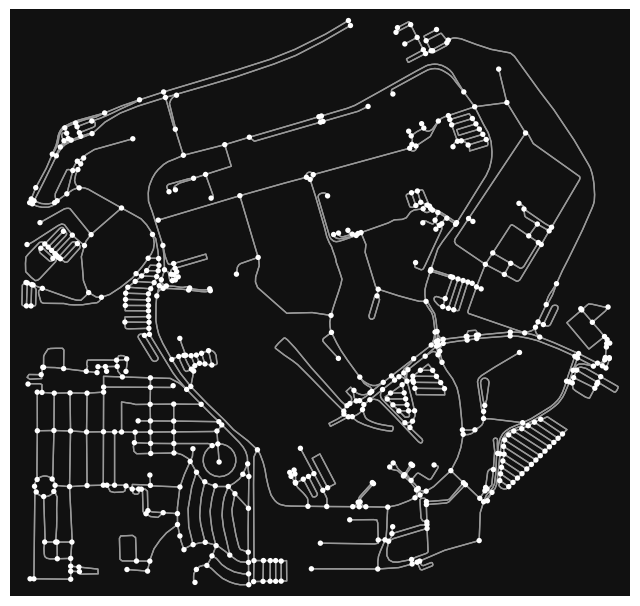

In [83]:
# !pip install osmnx

import osmnx as ox
import matplotlib.pyplot as plt


place_name = "KFUPM, Dahran, Saudi Arabia"
distance = 1000  # in meters

# fetch OSM street network (drive, walk, private, etc.) from the location
graph = ox.graph_from_address(place_name, dist=distance, network_type='walk')
fig, ax = ox.plot_graph(graph)

#### Edges and Node

We can extract the nodes and edges of the graph as separate structures.

In [84]:
nodes, edges = ox.graph_to_gdfs(graph)
nodes.head(5)

,y,x,street_count,highway,geometry
osmid,,,,,
287308073,26.311618,50.138785,3,NaN,POINT (50.13878 26.31162)
287308079,26.310419,50.137182,3,NaN,POINT (50.13718 26.31042)
287308325,26.314783,50.139992,3,NaN,POINT (50.13999 26.31478)
287308522,26.312011,50.139289,3,NaN,POINT (50.13929 26.31201)
287308527,26.310958,50.139235,3,NaN,POINT (50.13923 26.31096)


In [85]:
edges.head(5)

osmid    highway           name  oneway  \
u         v          key                                                
287308073 6346224859 0    244261564  secondary  Hospital Road   False   
          433578100  0    244261564  secondary  Hospital Road   False   
          6346224832 0    677776760    service            NaN   False   
287308079 287313571  0    244261564  secondary  Hospital Road   False   
          6346224859 0    244261564  secondary  Hospital Road   False   

                         reversed      length  \
u         v          key                        
287308073 6346224859 0      False   67.024621   
          433578100  0       True   87.225950   
          6346224832 0       True   35.786432   
287308079 287313571  0      False   47.888156   
          6346224859 0       True  145.169970   

                                                                   geometry  \
u         v          key                                                      
287308073 6346224859 0    LINESTRING (50.13878 26.31162, 50.13869 26.311...   
          433578100  0    LINESTRING (50.13878 26.31162, 50.13889 26.311...   
          6346224832 0    LINESTRING (50.13878 26.31162, 50.13901 26.311...   
287308079 287313571  0    LINESTRING (50.13718 26.31042, 50.13701 26.310...   
          6346224859 0    LINESTRING (50.13718 26.31042, 50.13746 26.310...   

                         maxspeed lanes  ref service junction access tunnel  
u         v          key                                                     
287308073 6346224859 0        NaN   NaN  NaN     NaN      NaN    NaN    NaN  
          433578100  0        NaN   NaN  NaN     NaN      NaN    NaN    NaN  
          6346224832 0        NaN   NaN  NaN     NaN      NaN    NaN    NaN  
287308079 287313571  0        NaN   NaN  NaN     NaN      NaN    NaN    NaN  
          6346224859 0        NaN   NaN  NaN     NaN      NaN    NaN    NaN

We can further drill down to examine each individual node or edge.

In [86]:
# Rendering the 2nd node
list(graph.nodes(data=True))[1]

(287308079, {'y': 26.3104186, 'x': 50.1371823, 'street_count': 3})

In [87]:
# Rendering the 1st edge
list(graph.edges(data=True))[0]

(287308073,
 6346224859,
 {'osmid': 244261564,
  'highway': 'secondary',
  'name': 'Hospital Road',
  'oneway': False,
  'reversed': False,
  'length': np.float64(67.02462134086224),
  'geometry': <LINESTRING (50.139 26.312, 50.139 26.311, 50.139 26.311, 50.138 26.311)>})

### Street Types
Street types can also be retrieved for the graph:

In [88]:
print(edges['highway'].value_counts())

highway
service                   930
residential               304
secondary                 184
tertiary                  146
unclassified               54
secondary_link             14
[service, residential]      2
Name: count, dtype: int64


### Calculating Network Statistics

In [89]:
ox.basic_stats(graph)

{'n': 580,
 'm': 1634,
 'k_avg': 5.63448275862069,
 'edge_length_total': 121474.98248111202,
 'edge_length_avg': 74.34209454168422,
 'streets_per_node_avg': 2.882758620689655,
 'streets_per_node_counts': {0: 0, 1: 64, 2: 0, 3: 458, 4: 57, 5: 0, 6: 1},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.1103448275862069,
  2: 0.0,
  3: 0.7896551724137931,
  4: 0.09827586206896552,
  5: 0.0,
  6: 0.0017241379310344827},
 'intersection_count': 516,
 'street_length_total': 60737.491240555864,
 'street_segment_count': 817,
 'street_length_avg': 74.34209454168405,
 'circuity_avg': 1.1548985135923135,
 'self_loop_proportion': 0.008567931456548347}

*** 

### Visualize points of interest

In [90]:
import folium

center=(26.3071, 50.1459) # KFUPM
source_point = (26.3032, 50.1594) # Dhahran Techno Valley
destination_point = (26.3142, 50.1476) # KFUPM Mall

m = folium.Map(location=center, zoom_start=15, zoom_control=False, scrollWheelZoom=False, dragging=False)
folium.Marker(location=source_point,icon=folium.Icon(color='red',icon='university', prefix='fa')).add_to(m)
folium.Marker(location=center,icon=folium.Icon(color='blue',icon='graduation-cap', prefix='fa')).add_to(m)
folium.Marker(location=destination_point,icon=folium.Icon(color='green',icon='store', prefix='fa')).add_to(m)

m

### Finding the shortest path

Let’s find the shortest path between Dhahran Techno Valley to KFUPM Mall. To calculate this shortest path, we first need to find the closest nodes on the network to our starting and ending locations.

In [91]:
import geopandas

X = [source_point[1], destination_point[1]]
Y = [source_point[0], destination_point[0]]
closest_nodes = ox.distance.nearest_nodes(graph,X,Y)

# Get the rows from the Node GeoDataFrame
closest_rows = nodes.loc[closest_nodes]

# Put the two nodes into a GeoDataFrame
od_nodes = geopandas.GeoDataFrame(closest_rows, geometry='geometry', crs=nodes.crs)
od_nodes

,y,x,street_count,highway,geometry
osmid,,,,,
6577764270,26.306218,50.152989,3,NaN,POINT (50.15299 26.30622)
9320389165,26.313631,50.147812,3,NaN,POINT (50.14781 26.31363)


Let’s find and plot the shortest route now!

In [92]:
import networkx

shortest_route = networkx.shortest_path(G=graph,source=closest_nodes[0],target=closest_nodes[1], weight='length')
print(shortest_route)

[np.int64(6577764270), 6577764271, 6577764272, 6577764273, 6577764274, 6577764279, 6577764280, 6577764281, 6577764282, 6577764278, 6577764191, 6577764192, 6577764206, 6578561629, 6578561668, 6578561641, 6578561631, 6582857315, 6582857312, 6582857302, 6582857298, 3326661500, 9726772823, 9726772826, 6582888344, 6587690331, 6582888369, 6582888346, 6582888359, 6582888357, 6582888355, 9320389175, 9320389174, np.int64(9320389165)]


### Visualize the shortest path

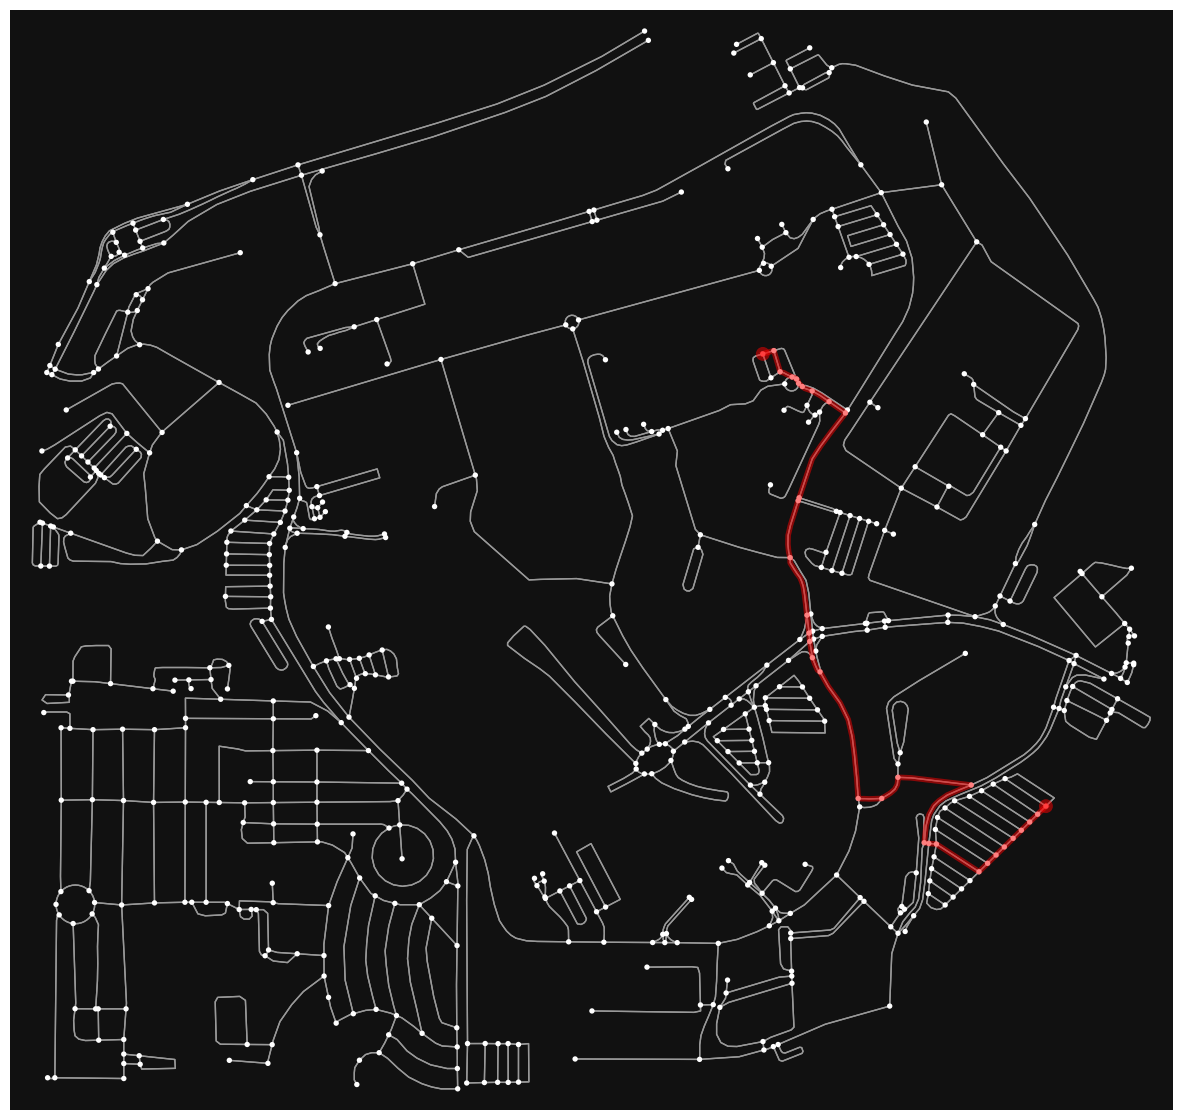

(<Figure size 1500x1500 with 1 Axes>, <Axes: >)

In [93]:
ox.plot_graph_route(graph,shortest_route,figsize=(15,15))

Let’s make a map that shows the above route, with both starting and ending nodes shown as markers using draw_route implemented as part of our Python package optalgotools.

In [94]:
# !pip install optalgotools
from optalgotools import routing

routing.draw_route(graph, shortest_route)

***
## Gas Stations in Riyadh as an example

 Let's use a dataset of public locations, such as gas stations or landmarks in Saudi Arabia, which you can retrieve via OpenStreetMap's Overpass API.

In [95]:
import requests
import folium

# Define the location of Saudi Arabia (e.g., Riyadh)
lat, lon = 24.7136, 46.6753  # Coordinates for Riyadh, Saudi Arabia

# URL for Overpass API to fetch gas stations data in Saudi Arabia
overpass_url = "http://overpass-api.de/api/interpreter"
overpass_query = """
[out:json];
node["amenity"="fuel"](24.5,46.0,25.0,47.0);  // Bounding box for Riyadh area
out body;
"""

# Fetch the data from Overpass API
response = requests.get(overpass_url, params={'data': overpass_query})
data = response.json()

# Extract the gas station data from the JSON response
stations = []
for element in data['elements']:
    if 'lat' in element and 'lon' in element:
        stations.append({
            'station_id': element.get('id'),
            'name': element.get('tags', {}).get('name', 'Unknown'),
            'lat': element['lat'],
            'lon': element['lon'],
            'address': element.get('tags', {}).get('address', 'N/A'),
        })

# Create a folium map centered around Riyadh
saudi_map = folium.Map(location=[lat, lon], zoom_start=12)

# Add markers for each gas station
for station in stations:
    lat = station["lat"]
    lon = station["lon"]
    id = station["station_id"]
    name = station["name"]
    address = station["address"]

    # Create a marker and add it to the map
    folium.Marker(
        location=[lat, lon],
        popup=f"Id: {id}<br>Name: {name}<br>Address: {address}",
        icon=folium.Icon(color="red", icon="info-sign"),
    ).add_to(saudi_map)

# Display the map
saudi_map

📚 **For more information:** Please refer to this short article: [Handling Geospatial Data and Mapping in Python](https://medium.com/ai4sm/handling-geospatial-data-and-mapping-in-python-5e63326a13d5)